In [1]:
import jax
jax.config.update("jax_enable_x64", True)

import h5py
import numpy as np
import scipy.optimize
import jax.numpy as jnp
import fitsio
from scipy.stats import gaussian_kde

import ultraplot as uplt

In [2]:
d = fitsio.read("/Users/beckermr/Desktop/input_cosmos_v4_montara_simcat_v7_seed42.fits")

In [3]:
d.shape

(223007,)

In [4]:
zvals = np.arange(0.01, 4.01, 0.05) + 0.05/2

In [6]:
zbe = np.concatenate([zvals - 0.05 /2, [zvals[-1] + 0.05/2]])

In [9]:
zp = np.clip(d["photoz"], 0.01, 4.0)

In [11]:
zp.min(), zp.max()

(0.01, 4.0)

In [12]:
np.mean(zp)

1.3214080755467414

<a list of 1 Line2D objects>

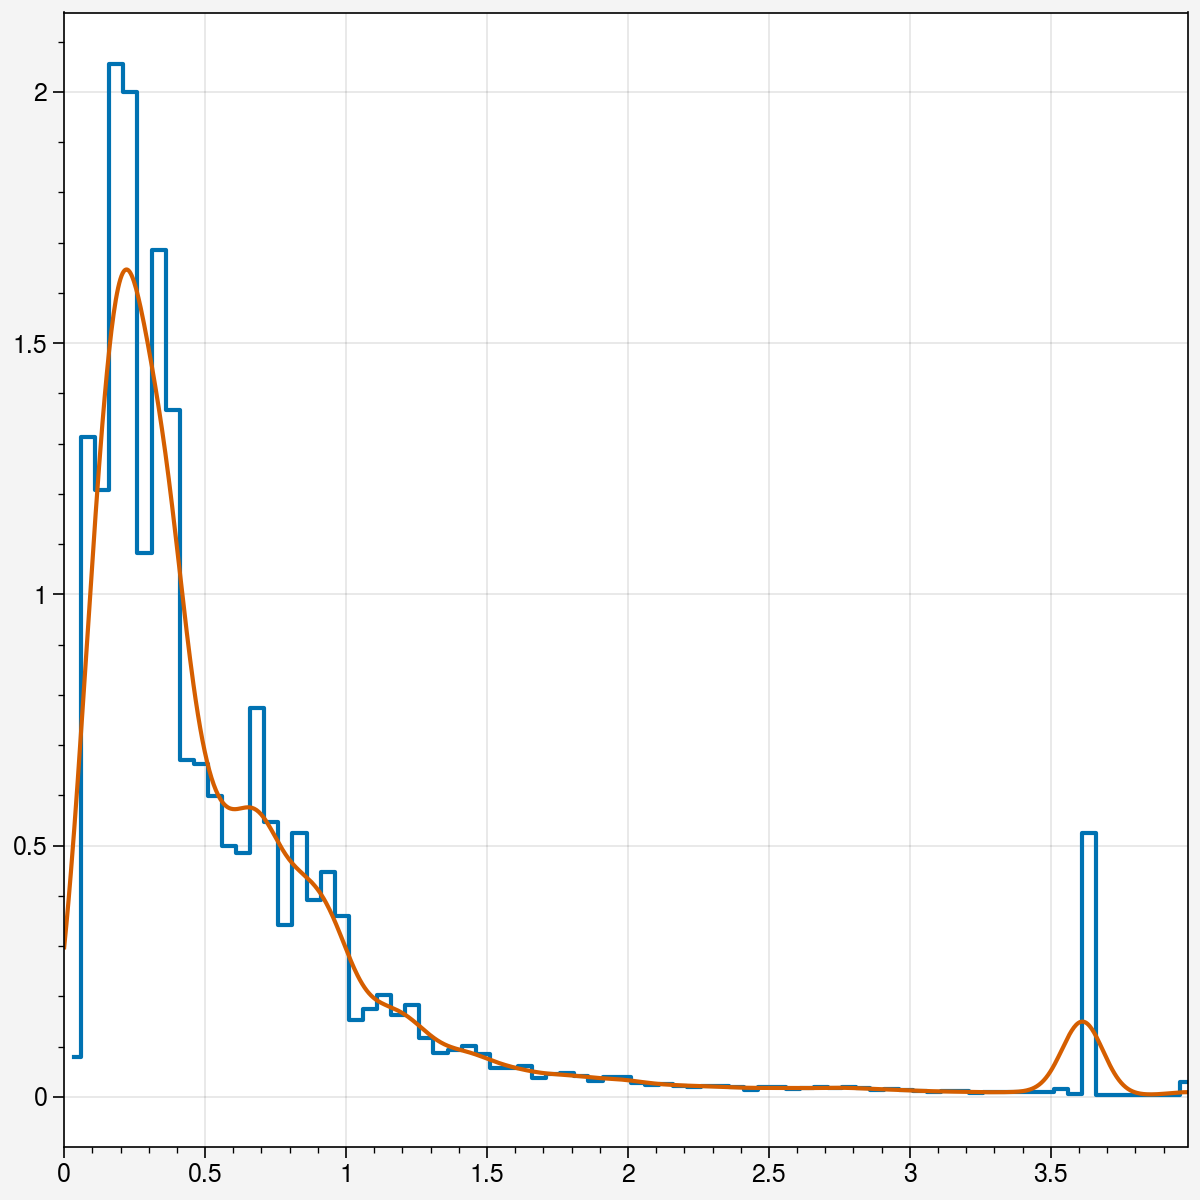

In [17]:
wgt = d["flux_r"] + d["flux_i"] + d["flux_z"]


kde = gaussian_kde(
    zp,
    weights=wgt,
    bw_method=0.1,
)

fig, axs = uplt.subplots(figsize=(6, 6))

ax = axs[0, 0]

h, be = np.histogram(
    zp,
    bins=zbe,
    density=False,
    weights=wgt,
)
dx = zbe[1:] - zbe[:-1]
h = h / dx
h = h / np.sum(h * dx)
assert np.allclose(np.sum(h * dx), 1.0)
assert h.shape == zvals.shape

ax.plot(zvals, h, drawstyle="steps-mid")

zv = np.linspace(0, zvals[-1], 1000)
kde_vals = kde.evaluate(zv)
ax.plot(zv, kde_vals)


In [18]:
fitsio.write("gtemplate_hist_input_cosmos_v4_montara_simcat_v7_seed42.fits", h, clobber=True)

In [23]:
print(f"np.{repr(h)}")

np.array([0.07959297, 1.3127611 , 1.20709441, 2.05539883, 2.0001857 ,
       1.08273066, 1.68608845, 1.36694518, 0.67110165, 0.66205455,
       0.59837816, 0.50022884, 0.48489532, 0.77303018, 0.5464605 ,
       0.34234327, 0.5257428 , 0.3917214 , 0.44824593, 0.36044462,
       0.15356257, 0.17509042, 0.20335409, 0.16346964, 0.18261861,
       0.11660055, 0.08793331, 0.09265545, 0.10148718, 0.08529677,
       0.05696838, 0.05787366, 0.06207161, 0.03662543, 0.04652942,
       0.04792522, 0.0415466 , 0.03082155, 0.03927816, 0.04003989,
       0.02836445, 0.02382023, 0.02607327, 0.02239081, 0.02032293,
       0.02177557, 0.02076443, 0.01927274, 0.01435144, 0.01960923,
       0.01964712, 0.01547004, 0.01688029, 0.01884968, 0.01856474,
       0.01980636, 0.01701184, 0.01327781, 0.01570519, 0.01410957,
       0.01191486, 0.00897651, 0.01219978, 0.01082054, 0.00800058,
       0.00952325, 0.00941157, 0.0093954 , 0.00969362, 0.00960027,
       0.01553798, 0.00565781, 0.52428815, 0.003932  , 0.00